In [1]:
#Data Credit: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset
#import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sales_data=pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

### Table of Contents
* [INITIAL EXPLORATION](#section1)
* [UNIVARIATE ANALYSIS](#section2)

## INITIAL EXPLORATION <a class="anchor"  id="section1"></a>

In [2]:
#first five and last five rows of data
pd.concat([sales_data.head(),sales_data.tail()])

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [3]:
#No. of Rows and Columns
sales_data.shape

(1000, 9)

In [4]:
#Check for Missing values
sales_data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
#Check for Duplicate Rows
sales_data.duplicated().sum()

0

In [6]:
#Datatypes of each column
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
#Essential statistics for each column
sales_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Date, Gender and Product Category can be updated with appropriate data-types

In [8]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])
sales_data['Gender']=sales_data['Gender'].astype('category')
sales_data['Product Category']=sales_data['Product Category'].astype('category')
sales_data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [9]:
#Drop Transaction ID column as it is not necessary for the analysis
sales_data.drop('Transaction ID', axis=1, inplace=True)

In [10]:
#Save a copy of the updated dataframe
temp_sales_data=sales_data.copy()

In [11]:
#Essential statistics for each column with updated dataframe
sales_data.describe()

,Date,Age,Quantity,Price per Unit,Total Amount
count,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,NaN,13.68143,1.132734,189.681356,559.997632


## UNIVARIATE ANALYSIS <a class="anchor"  id="section2"></a>

In [12]:
#description shows that 50% of shopping falls between April and Oct 2023
sales_data['Date'].describe()

count                             1000
mean     2023-07-03 00:25:55.200000256
min                2023-01-01 00:00:00
25%                2023-04-08 00:00:00
50%                2023-06-29 12:00:00
75%                2023-10-04 00:00:00
max                2024-01-01 00:00:00
Name: Date, dtype: object

<Axes: xlabel='Date', ylabel='Count'>

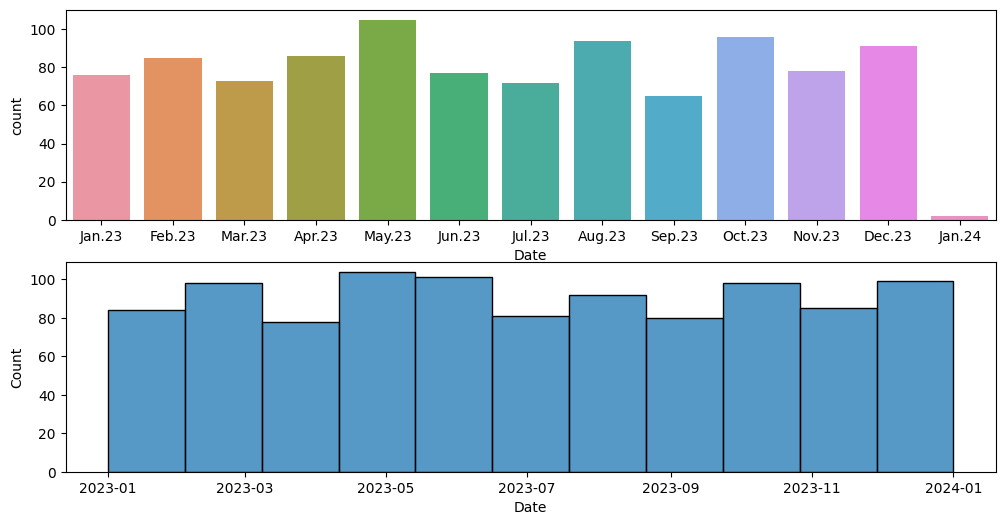

In [124]:
#No.of transactions in Jan 2024 is negligible,however need to check w.r.t. other parameters
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.countplot(sales_data,x=sales_data.sort_values('Date')['Date'].dt.strftime('%b.%y'),ax=axes[0])
sns.histplot(sales_data,x='Date',ax=axes[1])

<Axes: >

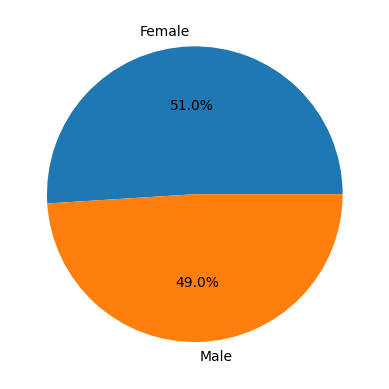

In [20]:
#Only 2 percent difference between no. of transactions between male and female
sales_data['Gender'].value_counts().plot(kind='pie', autopct='%.1f%%',ylabel='')

In [29]:
#50% of transactions were by customers of age 29 years to 53 years
sales_data['Age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

In [30]:
sales_data['Age'].skew()

-0.04881245380328967

<Axes: ylabel='Frequency'>

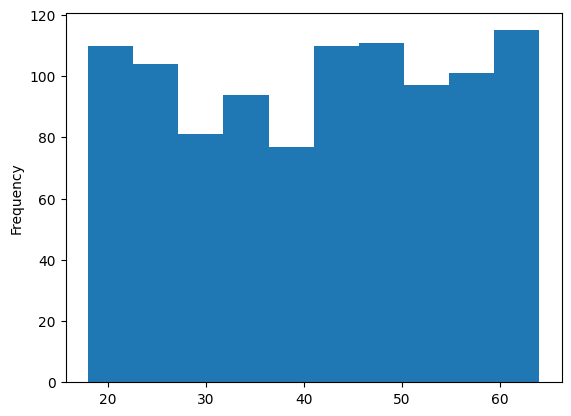

In [28]:
#Not much variation in no. of transactions by Age. In line with describe method results
sales_data['Age'].plot(kind='hist')

In [31]:
sales_data['Quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

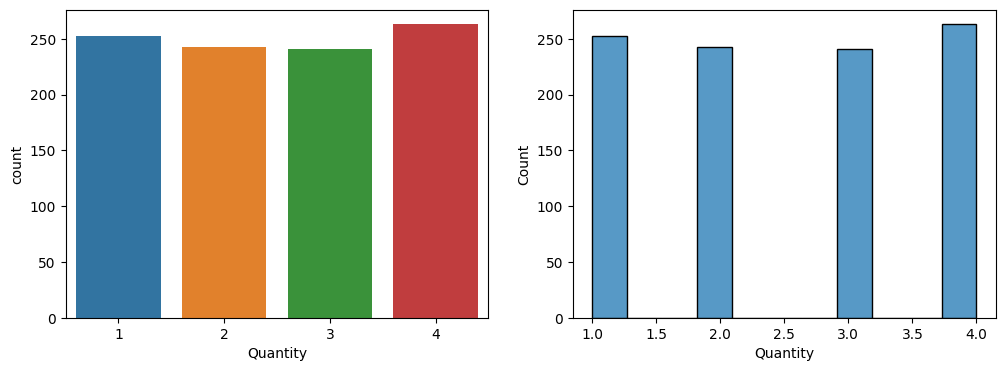

In [52]:
#No significant variations
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(sales_data, x='Quantity',ax=axes[0])
sns.histplot(sales_data, x='Quantity',ax=axes[1])
plt.show()

In [39]:
#50% of entries have Price per Unit from 30 to 300
sales_data['Price per Unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64

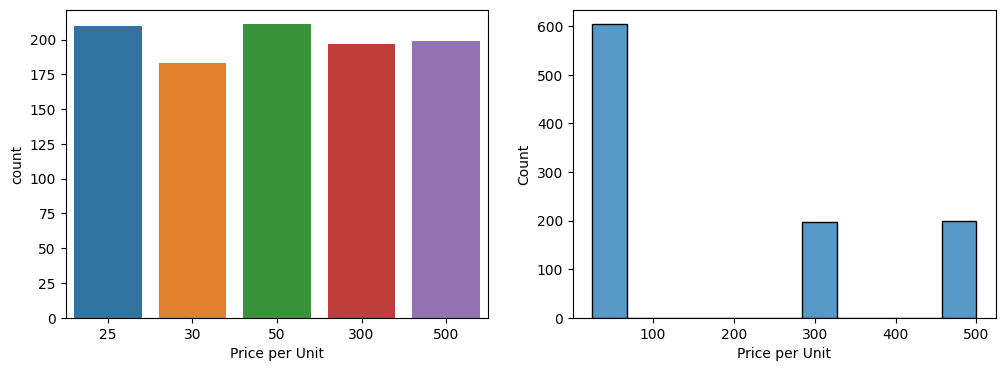

In [53]:
#describe method and charts show that 50% of entries have Price per Unit from 30 to 300
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(sales_data, x='Price per Unit',ax=axes[0])
sns.histplot(sales_data, x='Price per Unit',ax=axes[1])
plt.show()

In [55]:
#50% of entries have Total Amount from 25 to 900
sales_data['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

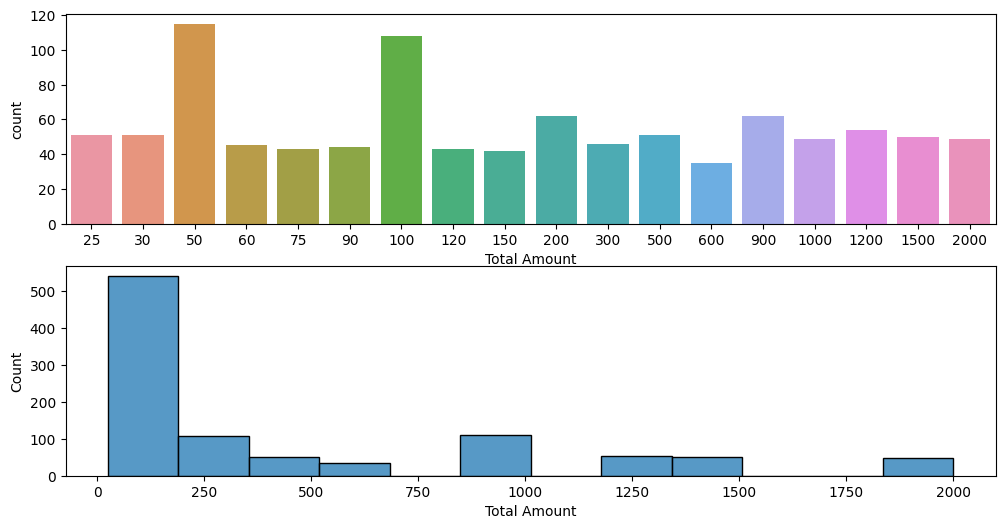

In [174]:
#describe method and charts show that 50% of entries have Total Amount from 25 to 900
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.countplot(sales_data, x='Total Amount',ax=axes[0])
sns.histplot(sales_data, x='Total Amount',ax=axes[1])
plt.show()